In [13]:
#Loading
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [14]:
# loading the data
mobilize_file_path = '../data/Mobilisation_data.csv'
mobilize_info_file_path =  '../data/info_mobilize.csv'

incident_file_path = '../data/Incident_data.csv'
incident_info_file_path =  '../data/info_incident.csv'

mobilize = pd.read_csv(mobilize_file_path, low_memory=False)  #mobilization dataframe
incident = pd.read_csv(incident_file_path, low_memory=False)  # incident dataframe

In [15]:
# join the two dataframes and print analysis
merged_df = mobilize.merge(right=incident, on=["IncidentNumber", "HourOfCall", "CalYear"], how="inner")
#analyze_dataset('Merged dataframe', merged_df)
print(len(merged_df))

display(merged_df)

2160394


,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,235138081,2009,0,38426,H271,1,01/01/2009 00:02:27,NaN,01/01/2009 00:07:46,NaN,NaN,319,01/01/2009 00:16:46,01/01/2009 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:00:37,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,1.0,255.0,1.0
1,235138081,2009,0,38427,H212,2,01/01/2009 00:02:27,01/01/2009 00:06:40,01/01/2009 00:08:09,253.0,89.0,342,01/01/2009 00:12:17,01/01/2009 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:00:37,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,1.0,255.0,1.0
2,2091,2009,0,38429,A341,1,01/01/2009 00:04:09,01/01/2009 00:06:40,01/01/2009 00:09:17,151.0,157.0,308,01/01/2009 00:16:33,01/01/2009 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:03:00,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
3,3091,2009,0,38430,G232,1,01/01/2009 00:04:57,01/01/2009 00:06:45,01/01/2009 00:08:27,108.0,102.0,210,01/01/2009 00:20:38,01/01/2009 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:04:27,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
4,5091,2009,0,38432,A311,1,01/01/2009 00:06:04,01/01/2009 00:07:58,01/01/2009 00:09:57,114.0,119.0,233,01/01/2009 00:11:58,01/01/2009 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,01 Jan 2009,00:05:39,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2.0,1.0,255.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160389,045038-01042023,2023,0,6336952,A331,1,31/03/2023 23:06:01,31/03/2023

In [16]:
merged_df["DateOfCall"] = pd.to_datetime(merged_df["DateOfCall"]) # turn data type into datetime
merged_df["day"] = merged_df["DateOfCall"].dt.day # create column weekday
merged_df["weekday"] = merged_df["DateOfCall"].dt.weekday # create column weekday
merged_df["month"] = merged_df["DateOfCall"].dt.month # create column month

In [17]:
# Remove unwanted rows
rr_df = merged_df[merged_df['PumpOrder'] == 1] # keep only PumpOrder 1
rr_df = rr_df[rr_df['AttendanceTimeSeconds'] >= 20] # only AttendanceTime over 10 seconds
rr_df = rr_df[rr_df['TravelTimeSeconds'] >= 10] # only TravelTime over 10 seconds
rr_df = rr_df[rr_df['TurnoutTimeSeconds'] >= 10]

rr_df['SpecialServiceType'].fillna('No Special Service', inplace=True) # fill the missing values of special service type with 'no special service'
rr_df = rr_df[~(rr_df['TurnoutTimeSeconds'] > rr_df['AttendanceTimeSeconds'])] # remove rows where attendanceTime is smaller than turnout time
rr_df = rr_df[rr_df['CalYear'] != 2020]   # Do not keep corona rows
rr_df = rr_df[rr_df['CalYear'] > 2014]      # Before 2014, the number of stations was different.

rr_df['DeployedFromStation_Name'] = rr_df['DeployedFromStation_Name'].str.lower()
rr_df['IncGeo_BoroughName'] = rr_df['IncGeo_BoroughName'].str.lower()
rr_df['StationLoc_same_IncidentLoc'] = (rr_df['DeployedFromStation_Name'] == rr_df['IncGeo_BoroughName']).astype(int)

In [ ]:
!pip install pyproj

In [18]:
#fill in missing values for easting and northing from the rounded ones (keeping the most accurate information when possible)
data = rr_df.copy()
data['Easting_m'].fillna(data['Easting_rounded'], inplace=True)
data['Northing_m'].fillna(data['Northing_rounded'], inplace=True)

# Calculate longitude and latitude from easting and northing
from pyproj import Transformer

# Initialize the transformer
transformer = Transformer.from_crs("epsg:27700", "epsg:4326")

for index, row in data.iterrows():
    lat, lon = transformer.transform(row['Easting_m'], row['Northing_m'])
    data.at[index, 'Incident_Latitude'] = lat
    data.at[index, 'Incident_Longitude'] = lon

display(data)

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls,day,weekday,month,StationLoc_same_IncidentLoc,Incident_Latitude,Incident_Longitude
899738,1151,2015,0,4436381,H262,1,01/01/2015 00:02:36,01/01/2015 00:03:55,01/01/2015 00:07:18,79.0,203.0,282,01/01/2015 00:35:20,01/01/2015 00:43:10,H26,addington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2015-01-01,00:02:15,Special Service,Special Service,RTC,Road Vehicle,Car,In street outside gazetteer location,CR0 5RE,CR0,NaN,NaN,E09000008,croydon,Croydon,E05011484,South Croydon,South Croydon,534581.0,164369.0,534550,164350,51.362452,-0.068299,London,Addington,282.0,Addington,285.0,Addington,1.0,2.0,2.0,2.0,590.0,1.0,1,3,1,0,51.362453,-0.068325
899740,4151,2015,0,4436383,A352,1,01/01/2015 00:03:14,01/01/2015 00:03:58,01/01/2015 00:09:58,44.0,360.0,404,01/01/2015 00:15:10,01/01/2015 00:27:26,A35,enfield,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,2015-01-01,00:03:05,Fire,Secondary Fire,No Special Service,Outdoor,Hedge,Correct incident location,EN2 0EW,EN2,2.071166e+08,20702538.0,E09000010,enfield,Enfield,E05013695,Whitewebbs,Whitewebbs,532655.0,198115.0,532650,198150,51.666164,-0.083258,London,Enfield,404.0,Enfield,NaN,NaN,1.0,1.0,1.0,1.0,295.0,3.0,1,3,1,1,51.666162,-0.083285
899741,8151,2015,0,4436385,G251,1,01/01/2015 00:04:54,01/01/2015 00:06:10,01/01/2015 00:09:53,76.0,223.0,299,01/01/2015 00:44:58,01/01/2015 00:50:28,G25,ealing,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2015-01-01,00:04:40,Fire,Secondary Fire,No Special Service,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,W7 1NP,W7,1.206194e+07,20600908.0,E09000009,ealing,Ealing,E05013529,North Hanwell,North Hanwell,515603.0,181226.0,515650,181250,51.518136,-0.335262,London,Ealing,299.0,Ealing,NaN,NaN,1.0,1.0,1.0,1.0,295.0,2.0,1,3,1,1,51.518135,-0.335284
899742,10151,2015,0,4436390,H291,1,01/01/2015 00:06:52,01/01/2015 00:11:01,01/01/2015 00:13:33,249.0,152.0,401,01/01/2015 00:20:53,01/01/2015 00:25:16,H29,purley,Home Station,1,Initial,Initial Mobilisation,11.0,Mob/Radio problems when mobilised,2015-01-01,00:06:20,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,CR8,0.000000e+00,20500307.0,E09000008,croydon,Croydon,E05011469,Kenley,Kenley,531450.0,159150.0,531450,159150,NaN,NaN,London,Purley,401.0,Purley,NaN,NaN,1.0,1.0,1.0,1.0,295.0,1.0,1,3,1,0,51.316283,-0.115196
899743,13151,2015,0,4436392,A361,1,01/01/2015 00:07:49,01/01/2015 00:08:21,01/01/2015 00:13:51,32.0,330.0,362,01/01/2015 01:10:41,01/01/2015 01:24:59,A36,southgate,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,2015-01-01,00:07:35,Fire,Primary Fire,No Special Service,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,NaN,EN2,0.000000e+00,20703006.0,E09000010,enfield,Enfield,E05013690,Ridgeway,Ridgeway,531650.0,196750.0,531650,196750,NaN,NaN,London,Enfield,362.0,Southgate,504.0,Enfield,2.0,2.0,2.0,2.0,590.0,1.0,1,3,1,0,51.654131,-0.098321
...,...,...,...

In [19]:
# Dataframe with coordinates of stations
L_L_Stations = pd.read_csv('..\data\lfb-stations-jun2021_LAtitude_Longitude.csv')

# Add missing station with its coordinates
new_row = pd.DataFrame({
    'Station_Name': ['heston'],
    'Station_Latitude': [51.4749050320984],
    'Station_Longitude': [-0.3430995118913883]
})

# Append the new row to the existing DataFrame using pandas.concat
L_L_Stations = pd.concat([L_L_Stations, new_row], ignore_index=True)

# Make sure all the rows are in lower case for correct merge
data['DeployedFromStation_Name'] = data['DeployedFromStation_Name'].str.lower()
L_L_Stations['Station_Name'] = L_L_Stations['Station_Name'].str.lower()

# Merge the dataframes
df_coordinate = pd.merge(data, L_L_Stations, how='left', left_on='DeployedFromStation_Name', right_on='Station_Name')

display(df_coordinate)

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls,day,weekday,month,StationLoc_same_IncidentLoc,Incident_Latitude,Incident_Longitude,Station_Name,Station_Latitude,Station_Longitude
0,1151,2015,0,4436381,H262,1,01/01/2015 00:02:36,01/01/2015 00:03:55,01/01/2015 00:07:18,79.0,203.0,282,01/01/2015 00:35:20,01/01/2015 00:43:10,H26,addington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2015-01-01,00:02:15,Special Service,Special Service,RTC,Road Vehicle,Car,In street outside gazetteer location,CR0 5RE,CR0,NaN,NaN,E09000008,croydon,Croydon,E05011484,South Croydon,South Croydon,534581.0,164369.0,534550,164350,51.362452,-0.068299,London,Addington,282.0,Addington,285.0,Addington,1.0,2.0,2.0,2.0,590.0,1.0,1,3,1,0,51.362453,-0.068325,addington,51.351802,-0.023968
1,4151,2015,0,4436383,A352,1,01/01/2015 00:03:14,01/01/2015 00:03:58,01/01/2015 00:09:58,44.0,360.0,404,01/01/2015 00:15:10,01/01/2015 00:27:26,A35,enfield,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,2015-01-01,00:03:05,Fire,Secondary Fire,No Special Service,Outdoor,Hedge,Correct incident location,EN2 0EW,EN2,2.071166e+08,20702538.0,E09000010,enfield,Enfield,E05013695,Whitewebbs,Whitewebbs,532655.0,198115.0,532650,198150,51.666164,-0.083258,London,Enfield,404.0,Enfield,NaN,NaN,1.0,1.0,1.0,1.0,295.0,3.0,1,3,1,1,51.666162,-0.083285,enfield,51.660016,-0.052311
2,8151,2015,0,4436385,G251,1,01/01/2015 00:04:54,01/01/2015 00:06:10,01/01/2015 00:09:53,76.0,223.0,299,01/01/2015 00:44:58,01/01/2015 00:50:28,G25,ealing,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2015-01-01,00:04:40,Fire,Secondary Fire,No Special Service,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,W7 1NP,W7,1.206194e+07,20600908.0,E09000009,ealing,Ealing,E05013529,North Hanwell,North Hanwell,515603.0,181226.0,515650,181250,51.518136,-0.335262,London,Ealing,299.0,Ealing,NaN,NaN,1.0,1.0,1.0,1.0,295.0,2.0,1,3,1,1,51.518135,-0.335284,ealing,51.511948,-0.313797
3,10151,2015,0,4436390,H291,1,01/01/2015 00:06:52,01/01/2015 00:11:01,01/01/2015 00:13:33,249.0,152.0,401,01/01/2015 00:20:53,01/01/2015 00:25:16,H29,purley,Home Station,1,Initial,Initial Mobilisation,11.0,Mob/Radio problems when mobilised,2015-01-01,00:06:20,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,CR8,0.000000e+00,20500307.0,E09000008,croydon,Croydon,E05011469,Kenley,Kenley,531450.0,159150.0,531450,159150,NaN,NaN,London,Purley,401.0,Purley,NaN,NaN,1.0,1.0,1.0,1.0,295.0,1.0,1,3,1,0,51.316283,-0.115196,purley,51.331843,-0.124801
4,13151,2015,0,4436392,A361,1,01/01/2015 00:07:49,01/01/2015 00:08:21,01/01/2015 00:13:51,32.0,330.0,362,01/01/2015 01:10:41,01/01/2015 01:24:59,A36,southgate,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,2015-01-01,00:07:35,Fire,Primary Fire,No Special Service,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,NaN,EN2,0.000000e+00,20703006.0,E09000010,enfield,Enfield,E05013690,Ridgeway,Ridgeway,531650.0,196750.0,5

In [20]:
# Calculate TravelDistance from the incident and station coordinates

from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert all latitudes/longitudes from decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    R = 6371  # Radius of earth in kilometers
    return c * R


df_coordinate['TravelDistance'] = df_coordinate.apply(lambda row: haversine(row['Station_Latitude'], row['Station_Longitude'], row['Incident_Latitude'], row['Incident_Longitude']), axis=1)
display(df_coordinate)

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,TravelTimeSeconds,AttendanceTimeSeconds,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls,day,weekday,month,StationLoc_same_IncidentLoc,Incident_Latitude,Incident_Longitude,Station_Name,Station_Latitude,Station_Longitude,TravelDistance
0,1151,2015,0,4436381,H262,1,01/01/2015 00:02:36,01/01/2015 00:03:55,01/01/2015 00:07:18,79.0,203.0,282,01/01/2015 00:35:20,01/01/2015 00:43:10,H26,addington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2015-01-01,00:02:15,Special Service,Special Service,RTC,Road Vehicle,Car,In street outside gazetteer location,CR0 5RE,CR0,NaN,NaN,E09000008,croydon,Croydon,E05011484,South Croydon,South Croydon,534581.0,164369.0,534550,164350,51.362452,-0.068299,London,Addington,282.0,Addington,285.0,Addington,1.0,2.0,2.0,2.0,590.0,1.0,1,3,1,0,51.362453,-0.068325,addington,51.351802,-0.023968,3.299872
1,4151,2015,0,4436383,A352,1,01/01/2015 00:03:14,01/01/2015 00:03:58,01/01/2015 00:09:58,44.0,360.0,404,01/01/2015 00:15:10,01/01/2015 00:27:26,A35,enfield,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,2015-01-01,00:03:05,Fire,Secondary Fire,No Special Service,Outdoor,Hedge,Correct incident location,EN2 0EW,EN2,2.071166e+08,20702538.0,E09000010,enfield,Enfield,E05013695,Whitewebbs,Whitewebbs,532655.0,198115.0,532650,198150,51.666164,-0.083258,London,Enfield,404.0,Enfield,NaN,NaN,1.0,1.0,1.0,1.0,295.0,3.0,1,3,1,1,51.666162,-0.083285,enfield,51.660016,-0.052311,2.242970
2,8151,2015,0,4436385,G251,1,01/01/2015 00:04:54,01/01/2015 00:06:10,01/01/2015 00:09:53,76.0,223.0,299,01/01/2015 00:44:58,01/01/2015 00:50:28,G25,ealing,Home Station,1,Initial,Initial Mobilisation,NaN,NaN,2015-01-01,00:04:40,Fire,Secondary Fire,No Special Service,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,W7 1NP,W7,1.206194e+07,20600908.0,E09000009,ealing,Ealing,E05013529,North Hanwell,North Hanwell,515603.0,181226.0,515650,181250,51.518136,-0.335262,London,Ealing,299.0,Ealing,NaN,NaN,1.0,1.0,1.0,1.0,295.0,2.0,1,3,1,1,51.518135,-0.335284,ealing,51.511948,-0.313797,1.638306
3,10151,2015,0,4436390,H291,1,01/01/2015 00:06:52,01/01/2015 00:11:01,01/01/2015 00:13:33,249.0,152.0,401,01/01/2015 00:20:53,01/01/2015 00:25:16,H29,purley,Home Station,1,Initial,Initial Mobilisation,11.0,Mob/Radio problems when mobilised,2015-01-01,00:06:20,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,CR8,0.000000e+00,20500307.0,E09000008,croydon,Croydon,E05011469,Kenley,Kenley,531450.0,159150.0,531450,159150,NaN,NaN,London,Purley,401.0,Purley,NaN,NaN,1.0,1.0,1.0,1.0,295.0,1.0,1,3,1,0,51.316283,-0.115196,purley,51.331843,-0.124801,1.854438
4,13151,2015,0,4436392,A361,1,01/01/2015 00:07:49,01/01/2015 00:08:21,01/01/2015 00:13:51,32.0,330.0,362,01/01/2015 01:10:41,01/01/2015 01:24:59,A36,southgate,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up,2015-01-01,00:07:35,Fire,Primary Fire,No Special Service,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Within same building,NaN,EN2,0.000000e+00,20703006.0,E09000010,enfield,Enfi

48344600


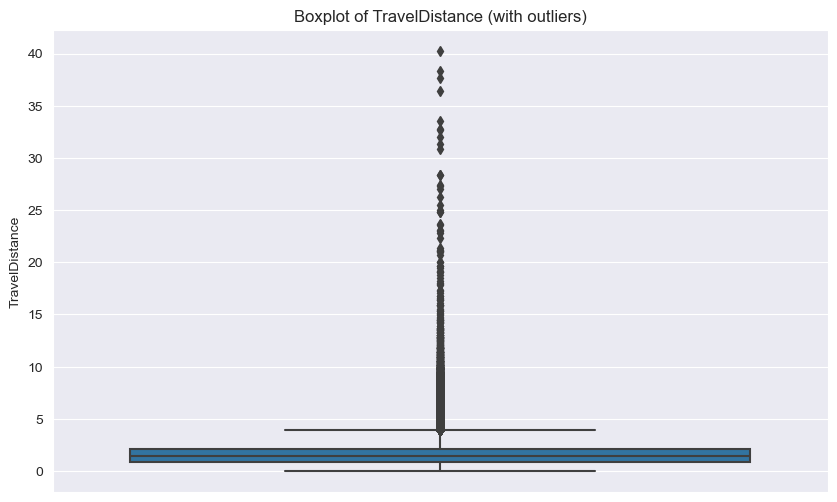

48344600


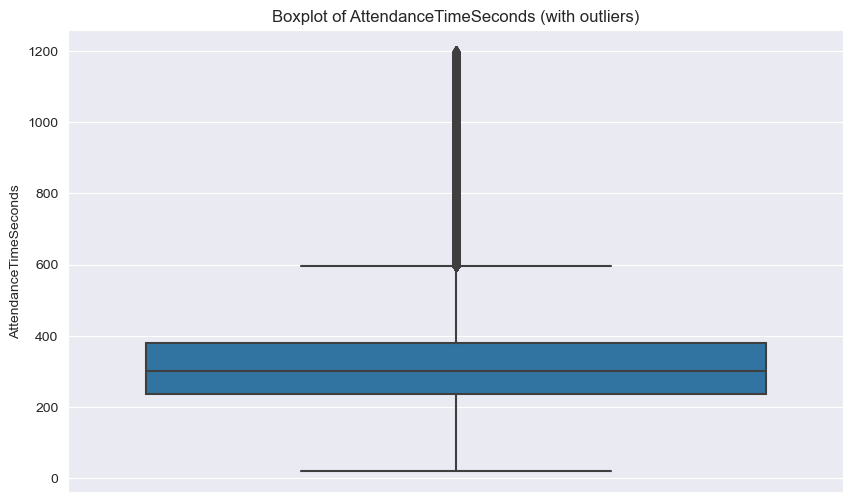

49055550


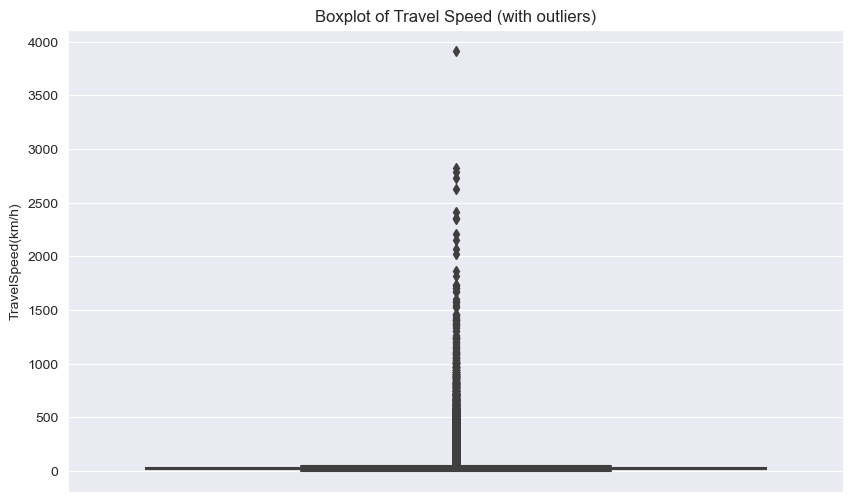

In [21]:
print(df_coordinate.size)
plt.figure(figsize=(10, 6))
# Plot the boxplot before removing outliers
sns.boxplot(data=df_coordinate, y='TravelDistance')
plt.title('Boxplot of TravelDistance (with outliers)')
# Show the plot
plt.show()

print(df_coordinate.size)
plt.figure(figsize=(10, 6))
# Plot the boxplot before removing outliers
sns.boxplot(data=df_coordinate, y='AttendanceTimeSeconds')
plt.title('Boxplot of AttendanceTimeSeconds (with outliers)')
# Show the plot
plt.show()

df_coordinate['TravelSpeed(km/h)'] = round((df_coordinate['TravelDistance'] /(df_coordinate['TravelTimeSeconds']/3600)),3)
print(df_coordinate.size)
plt.figure(figsize=(10, 6))
# Plot the boxplot before removing outliers
sns.boxplot(data=df_coordinate, y='TravelSpeed(km/h)')
plt.title('Boxplot of Travel Speed (with outliers)')
# Show the plot
plt.show()

574218


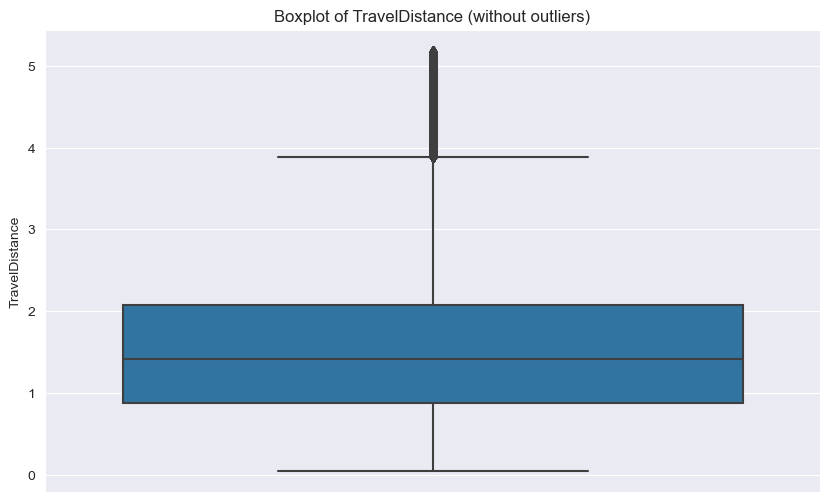

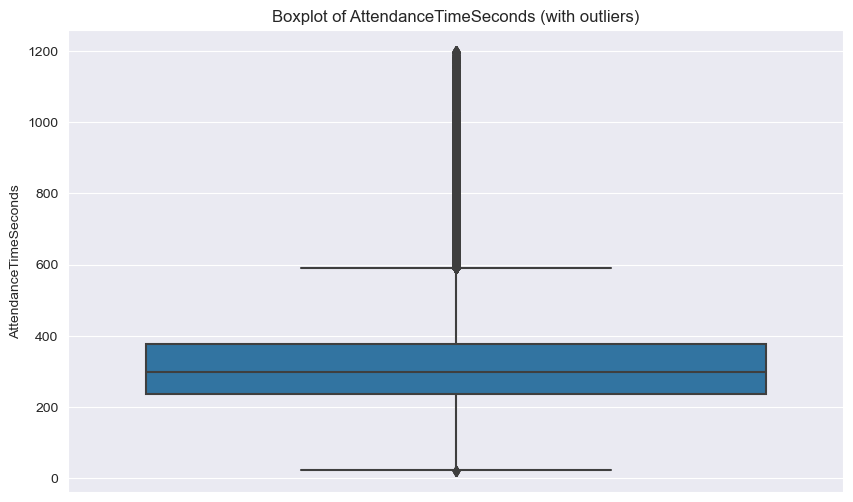

In [22]:
# calculate first quartile (Q1)
Q1 = df_coordinate['TravelDistance'].quantile(0.25)

# Calculate (Q3)
Q3 = df_coordinate['TravelDistance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

############### Remove the rows that have 'TravelDistance' values outside the lower and upper bounds####################
df_no_outliers = df_coordinate[(df_coordinate['TravelDistance'] >= lower_bound) & (df_coordinate['TravelDistance'] <= upper_bound)]
df_no_outliers = df_no_outliers[df_no_outliers['TravelDistance']>0.05]
print(df_coordinate.size - df_no_outliers.size)
# Create a larger figure
plt.figure(figsize=(10, 6))
# Plot the boxplot after removing outliers
sns.boxplot(data=df_no_outliers, y='TravelDistance')
plt.title('Boxplot of TravelDistance (without outliers)')
# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
# Plot the boxplot before removing outliers
sns.boxplot(data=df_no_outliers, y='AttendanceTimeSeconds')
plt.title('Boxplot of AttendanceTimeSeconds (without outliers)')
# Show the plot
plt.show()

48481332


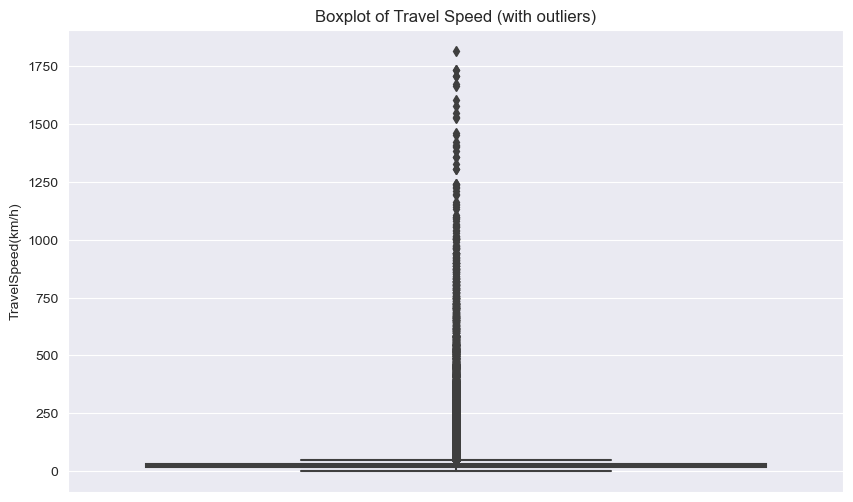

0


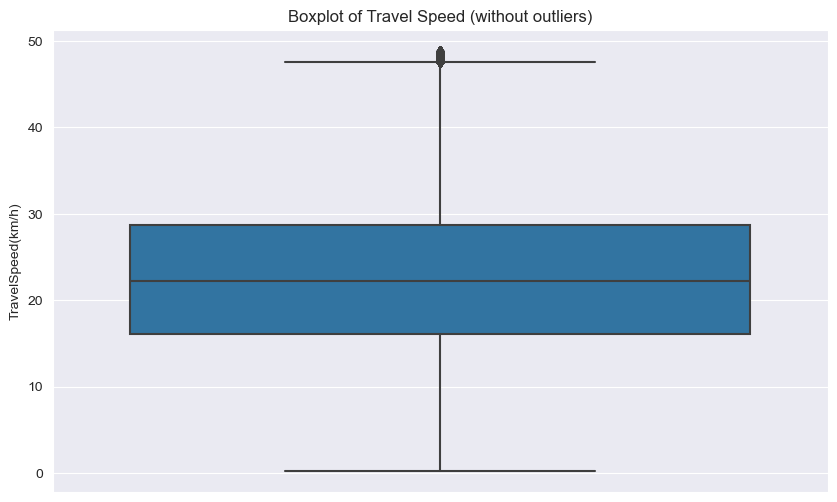

In [23]:
df_no_outliers['TravelSpeed(km/h)'] = round((df_no_outliers['TravelDistance'] /(df_no_outliers['TravelTimeSeconds']/3600)),3)
print(df_no_outliers.size)
plt.figure(figsize=(10, 6))
# Plot the boxplot before removing outliers
sns.boxplot(data=df_no_outliers, y='TravelSpeed(km/h)')
plt.title('Boxplot of Travel Speed (with outliers)')
# Show the plot
plt.show()

# calculate first quartile (Q1)
Q1 = df_no_outliers['TravelSpeed(km/h)'].quantile(0.25)

# Calculate (Q3)
Q3 = df_no_outliers['TravelSpeed(km/h)'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

################### Remove the rows that have 'TravelSpeed(km/h)' values outside the lower and upper bounds###########################
df_no_outliers = df_no_outliers[(df_no_outliers['TravelSpeed(km/h)'] >= lower_bound) & (df_no_outliers['TravelSpeed(km/h)'] <= upper_bound)]
print(df_no_outliers.size- df_no_outliers.size)
# Create a larger figure
plt.figure(figsize=(10, 6))
# Plot the boxplot after removing outliers
sns.boxplot(data=df_no_outliers, y='TravelSpeed(km/h)')
plt.title('Boxplot of Travel Speed (without outliers)')
# Show the plot
plt.show()

C:\Users\maxku\AppData\Local\Temp\ipykernel_27228\3075467849.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_1 = df_no_outliers[(df_coordinate['TravelDistance'] < 80) & (df_no_outliers['StationLoc_same_IncidentLoc'] == 1)]


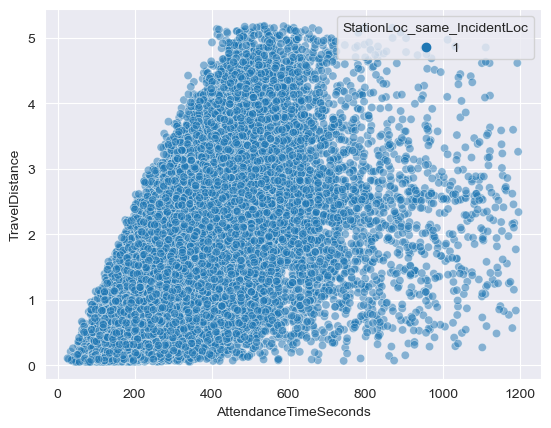

C:\Users\maxku\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


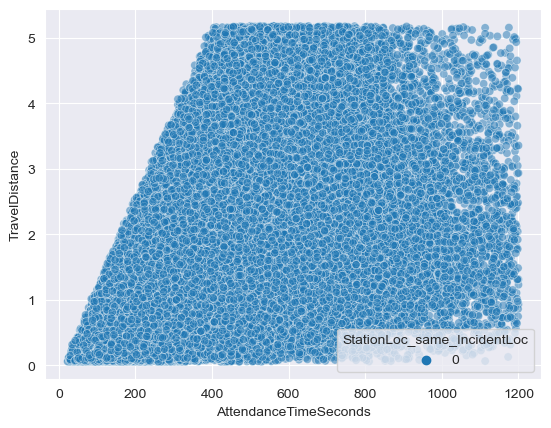

In [16]:
# Checking impact of new column
df_no_outliers['TravelDistance'].max()
filtered_df_1 = df_no_outliers[(df_coordinate['TravelDistance'] < 80) & (df_no_outliers['StationLoc_same_IncidentLoc'] == 1)]
sns.scatterplot(data=filtered_df_1, x='AttendanceTimeSeconds', y='TravelDistance', hue='StationLoc_same_IncidentLoc', alpha=0.5);
plt.show()

filtered_df_0 = df_no_outliers[(df_no_outliers['TravelDistance'] < 80) & (df_no_outliers['StationLoc_same_IncidentLoc'] == 0)]
sns.scatterplot(data=filtered_df_0, x='AttendanceTimeSeconds', y='TravelDistance', hue='StationLoc_same_IncidentLoc', alpha=0.5);
plt.show()

In [24]:
# Only keep the columns we want
to_keep = ['Resource_Code', 'DeployedFromStation_Name', 'DeployedFromLocation', 'IncidentGroup', 'SpecialServiceType', 'PropertyCategory',
           'Postcode_district', 'IncGeo_BoroughName', 'IncGeo_WardNameNew', 'IncidentStationGround', 'day', 'weekday', 'month','CalYear', 'HourOfCall',
           'AttendanceTimeSeconds', 'UPRN', 'USRN', 'Station_Longitude', 'Station_Latitude', 'Incident_Longitude', 'Incident_Latitude', 'TravelDistance', 'StationLoc_same_IncidentLoc']

df = df_no_outliers.copy()
df = df[to_keep]
df = df.dropna()
display(df.head(25))
df.to_csv('../data/df_no_outliers.csv', index=False)

,Resource_Code,DeployedFromStation_Name,DeployedFromLocation,IncidentGroup,SpecialServiceType,PropertyCategory,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,IncidentStationGround,day,weekday,month,CalYear,HourOfCall,AttendanceTimeSeconds,UPRN,USRN,Station_Longitude,Station_Latitude,Incident_Longitude,Incident_Latitude,TravelDistance,StationLoc_same_IncidentLoc,TravelSpeed(km/h)
1,A352,enfield,Home Station,Fire,No Special Service,Outdoor,EN2,enfield,Whitewebbs,Enfield,1,3,1,2015,0,404,2.071166e+08,20702538.0,-0.052311,51.660016,-0.083285,51.666162,2.242970,1,22.430
2,G251,ealing,Home Station,Fire,No Special Service,Outdoor,W7,ealing,North Hanwell,Ealing,1,3,1,2015,0,299,1.206194e+07,20600908.0,-0.313797,51.511948,-0.335284,51.518135,1.638306,1,26.448
3,H291,purley,Home Station,Special Service,Flooding,Dwelling,CR8,croydon,Kenley,Purley,1,3,1,2015,0,401,0.000000e+00,20500307.0,-0.124801,51.331843,-0.115196,51.316283,1.854438,0,43.921
4,A361,southgate,Home Station,Fire,No Special Service,Dwelling,EN2,enfield,Ridgeway,Enfield,1,3,1,2015,0,362,0.000000e+00,20703006.0,-0.127323,51.630493,-0.098321,51.654131,3.303604,0,36.039
6,E392,bromley,Home Station,False Alarm,No Special Service,Non Residential,BR2,bromley,Hayes & Coney Hall,Bromley,1,3,1,2015,0,439,1.000229e+11,20302984.0,0.017117,51.407031,0.023034,51.371873,3.930923,1,38.877
7,H351,tooting,Home Station,False Alarm,No Special Service,Dwelling,SW16,wandsworth,Furzedown,Tooting,1,3,1,2015,0,246,0.000000e+00,22903989.0,-0.162711,51.437840,-0.145043,51.430067,1.499005,0,27.533
9,H322,norbury,Home Station,Fire,No Special Service,Outdoor,CR0,croydon,West Thornton,Norbury,1,3,1,2015,0,283,1.000206e+11,20500678.0,-0.121411,51.406794,-0.107470,51.388568,2.245613,0,34.401
10,A392,finchley,Home Station,False Alarm,No Special Service,Dwelling,N12,barnet,Totteridge & Woodside,Finchley,1,3,1,2015,0,420,0.000000e+00,20047360.0,-0.179353,51.597877,-0.180667,51.619467,2.402436,0,27.810
11,A311,holloway,Home Station,False Alarm,No Special Service,Dwelling,N4,haringey,Stroud Green,Holloway,1,3,1,2015,0,237,0.000000e+00,21103252.0,-0.116038,51.561576,-0.107691,51.567956,0.914380,0,22.092
13,A242,soho,Home Station,False Alarm,No Special Service,Non Residential,W1D,westminster,West End,Soho,1,3,1,2015,0,166,1.000236e+11,8400953.0,-0.130084,51.512462,-0.133118,51.513995,0.270402,0,15.701


In [27]:
# change to category datatype, for training models
cleaned_df = df.copy()
for column in cleaned_df.select_dtypes(exclude=np.number):
    cleaned_df[column] = cleaned_df[column].astype('category')

# display missing values and data types for columns that are left in the dataframe - check no missing values?
display(pd.concat([cleaned_df.isnull().sum(), cleaned_df.dtypes, cleaned_df.nunique()], axis=1, keys=['Missing Values', 'Data Types', 'Number modalities']))
print('Cleaned data shape before dropping missing values:', cleaned_df.shape)

cleaned_df.dropna(inplace=True) # drop rows with missing values

display(pd.concat([cleaned_df.isnull().sum(), cleaned_df.dtypes, cleaned_df.nunique()], axis=1, keys=['Missing Values', 'Data Types', 'Number modalities']))
print('Cleaned data shape:', cleaned_df.shape)

,Missing Values,Data Types,Number modalities
Resource_Code,0,category,142
DeployedFromStation_Name,0,category,103
DeployedFromLocation,0,category,2
IncidentGroup,0,category,3
SpecialServiceType,0,category,22
PropertyCategory,0,category,9
Postcode_district,0,category,303
IncGeo_BoroughName,0,category,33
IncGeo_WardNameNew,0,category,1431
IncidentStationGround,0,category,102


Cleaned data shape before dropping missing values: (664290, 24)


,Missing Values,Data Types,Number modalities
Resource_Code,0,category,142
DeployedFromStation_Name,0,category,103
DeployedFromLocation,0,category,2
IncidentGroup,0,category,3
SpecialServiceType,0,category,22
PropertyCategory,0,category,9
Postcode_district,0,category,303
IncGeo_BoroughName,0,category,33
IncGeo_WardNameNew,0,category,1431
IncidentStationGround,0,category,102


Cleaned data shape: (664290, 24)


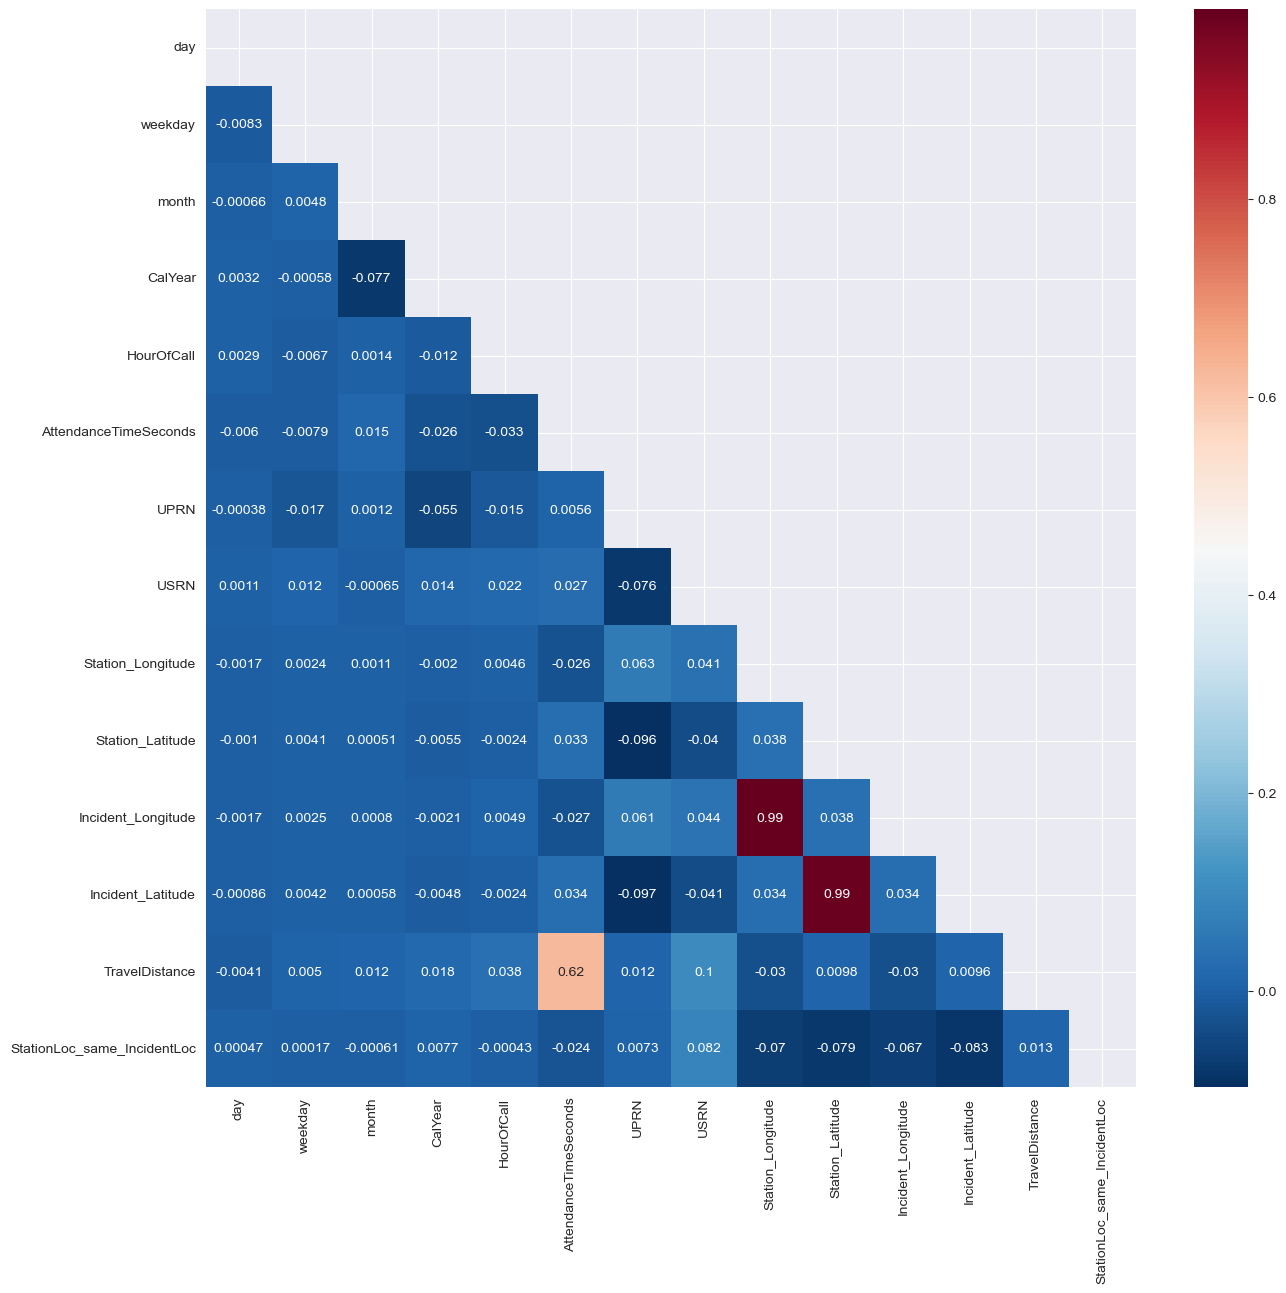

In [28]:
# Correlation
cleaned_df = cleaned_df.select_dtypes(include=np.number)
correlation_matrix = cleaned_df.corr()
matrix = np.triu(correlation_matrix)
rounded_corr_matrix = correlation_matrix.round(3)
plt.figure(figsize=(15,14))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', mask=matrix)
plt.show()

# Last steps before using models

In [33]:
!pip install category_encoders

In [ ]:
# Creating a dataframe without outliers in AttendanceTime to check performance of XGBoost

cleaned_df = pd.read_csv('../data/cleaned_df.csv')
fig, ax = plt.subplots(1, figsize=(10, 20))
sns.boxplot(y=cleaned_df['AttendanceTimeSeconds'])
plt.show()

q1 = cleaned_df['AttendanceTimeSeconds'].quantile(0.25)
q3 = cleaned_df['AttendanceTimeSeconds'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.8*(iqr)
lower_limit = q1 - 1.8*(iqr)
cleaned_df_IQR = cleaned_df[~((cleaned_df['AttendanceTimeSeconds']>upper_limit)|(cleaned_df['AttendanceTimeSeconds']<lower_limit))]

fig, ax = plt.subplots(1, figsize=(10, 20))
sns.boxplot(y=cleaned_df_IQR['AttendanceTimeSeconds'])
plt.show()

In [31]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import joblib


df_num = pd.read_csv('../data/df_no_outliers.csv')


columns_to_drop = ['Station_Latitude', 'Station_Longitude']
df_num = df_num.drop(columns_to_drop, axis=1)
cats = df_num.select_dtypes(exclude=np.number).columns.tolist()

train = df_num[df_num['CalYear'] < 2022]
test = df_num[df_num['CalYear'] >= 2022]

y_train, X_train = train['AttendanceTimeSeconds'], train.drop(['AttendanceTimeSeconds'], axis=1)
y_test, X_test = test['AttendanceTimeSeconds'], test.drop(['AttendanceTimeSeconds'], axis=1)


# BaseN Encoding
for col in cats:
    encoder = ce.BaseNEncoder(base=5) ### base=2(binary encoding) or even 1(one-hot encoding) can be considered ( result in slightly better performance in XGBoost with significantly longer computation times)
    data_encoded = encoder.fit_transform(X_train[[col]])
    X_train = pd.concat([X_train, data_encoded], axis=1)
    X_train.drop(col, axis=1, inplace=True)

    data_encoded_test = encoder.transform(X_test[[col]])
    X_test = pd.concat([X_test, data_encoded_test], axis=1)
    X_test.drop(col, axis=1, inplace=True)


scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Save encoders and scaler
joblib.dump(encoders, 'encoders.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Saving the dataframes for the models
X_train_std.to_csv('../data/X_train_std.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
X_test_std.to_csv('../data/X_test_std.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
X_train.to_csv('../data/X_train.csv', index=False)

In [101]:
#######----------For Streamlit-----------###########
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import shap
import matplotlib.pyplot as plt
import numpy as np


# Define feature_names from your DataFrame
feature_names = X_train_std.columns

# Create the XGBoost model with the best parameters
xgb_model = xgb.XGBRegressor(
    n_estimators=955,
    objective='reg:squarederror',
    max_depth=9,
    learning_rate=0.03924172708513039,
    gamma=1,
    min_child_weight=3,
    max_delta_step=7,
    subsample=0.954926731974235,
    colsample_bytree=0.9485923931410871,
    colsample_bylevel=0.8884720541146421,
    colsample_bynode=0.8535263718012538,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=4,
    tree_method="gpu_hist"
)

# Train the model
xgb_model.fit(X_train_std, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_std)

# Calculate evaluation metric
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
test = test.assign(Predicted_AttendanceTimeSeconds=y_pred)
display(test.head())

MAE: 56.22744783065468


,Resource_Code,DeployedFromStation_Name,DeployedFromLocation,IncidentGroup,SpecialServiceType,PropertyCategory,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,IncidentStationGround,day,weekday,month,CalYear,HourOfCall,AttendanceTimeSeconds,UPRN,USRN,Incident_Longitude,Incident_Latitude,TravelDistance,StationLoc_same_IncidentLoc,Predicted_AttendanceTimeSeconds
529291,A241,soho,Home Station,False Alarm,No Special Service,Dwelling,W1U,westminster,Marylebone,Euston,1,5,1,2022,0,563,0.000000e+00,8401559.0,-0.151550,51.518297,1.620911,0,332.602814
529292,G211,harrow,Home Station,Fire,No Special Service,Outdoor Structure,HA1,harrow,Greenhill,Harrow,1,5,1,2022,0,361,2.000003e+11,21201074.0,-0.330118,51.582113,2.681632,1,376.236572
529293,F441,east ham,Home Station,Fire,No Special Service,Non Residential,E6,newham,Boleyn,East Ham,1,5,1,2022,0,289,0.000000e+00,22200508.0,0.044936,51.528525,1.018312,0,259.920135
529294,G311,northolt,Home Station,Fire,No Special Service,Outdoor Structure,UB5,ealing,Northolt Mandeville,Northolt,1,5,1,2022,0,303,1.203722e+07,20601914.0,-0.380027,51.553346,1.423305,0,289.248596
529295,F351,woodford,Home Station,Fire,No Special Service,Outdoor,IG8,waltham forest,Hale End & Highams Park South,Woodford,1,5,1,2022,0,286,1.000226e+11,22819625.0,0.005923,51.606868,1.286346,0,391.256927


In [4]:
#######----------For Streamlit-----------###########
test.to_csv('../data/test.csv', index=False)
test.head()

,Resource_Code,DeployedFromStation_Name,DeployedFromLocation,IncidentGroup,SpecialServiceType,PropertyCategory,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,IncidentStationGround,day,weekday,month,CalYear,HourOfCall,AttendanceTimeSeconds,UPRN,USRN,Incident_Longitude,Incident_Latitude,TravelDistance,StationLoc_same_IncidentLoc
548796,A241,soho,Home Station,False Alarm,No Special Service,Dwelling,W1U,westminster,Marylebone,Euston,1,5,1,2022,0,563,0.000000e+00,8401559.0,-0.151550,51.518297,1.620911,0
548797,G211,harrow,Home Station,Fire,No Special Service,Outdoor Structure,HA1,harrow,Greenhill,Harrow,1,5,1,2022,0,361,2.000003e+11,21201074.0,-0.330118,51.582113,2.681632,1
548798,F441,east ham,Home Station,Fire,No Special Service,Non Residential,E6,newham,Boleyn,East Ham,1,5,1,2022,0,289,0.000000e+00,22200508.0,0.044936,51.528525,1.018312,0
548799,G311,northolt,Home Station,Fire,No Special Service,Outdoor Structure,UB5,ealing,Northolt Mandeville,Northolt,1,5,1,2022,0,303,1.203722e+07,20601914.0,-0.380027,51.553346,1.423305,0
548800,F351,woodford,Home Station,Fire,No Special Service,Outdoor,IG8,waltham forest,Hale End & Highams Park South,Woodford,1,5,1,2022,0,286,1.000226e+11,22819625.0,0.005923,51.606868,1.286346,0


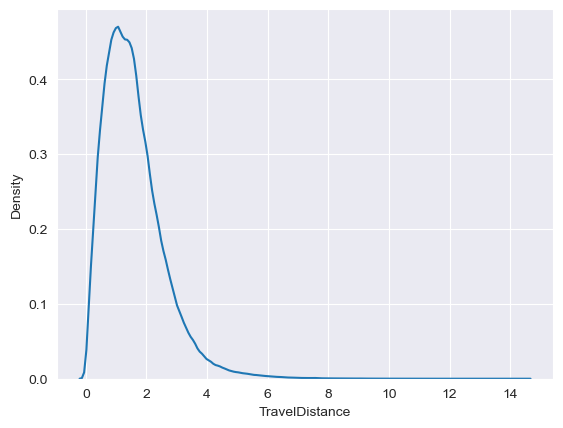

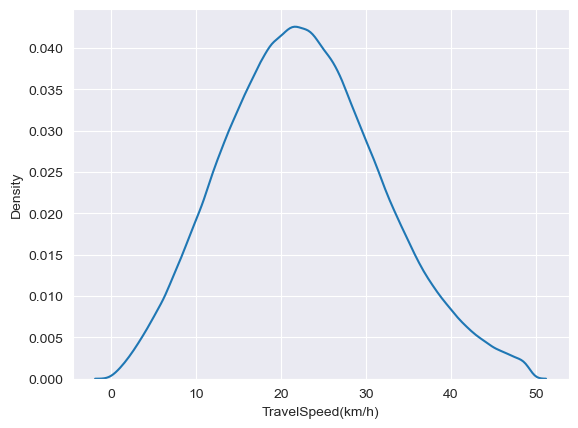

In [76]:
sns.kdeplot(cleaned_df['TravelDistance'])
plt.show()
sns.kdeplot(df_no_outliers['TravelSpeed(km/h)'])
plt.show()